# Exploratory Data Analysis (EDA)

Notebook by Jeremy Eng

## Outline:
- Introduction to EDA
- Statistics for EDA
- Data visualization for EDA
    - Matplotlib
    - Seaborn
    - Plotly
- Outlier Detection
- Handling Missing Values


## Introduction

- EDA involves exploration and preliminary analysis of a dataset.
- Involves examining summary statistics and exploring visualizations of the data.
- Can uncover anomalies, patterns, and relationships between variables.
- EDA usually goes hand-in hand with data cleaning.
- Further examination can be done by using hypothesis tests (on Monday).

---
### The Dataset

We will use a [diabetes dataset](https://github.com/plotly/datasets/blob/master/diabetes.csv) to demo the EDA process. Often datasets come with an explanation of the columns. For this dataset we can find that info [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). We can load in a CSV hosted on the web into a pandas dataframe as follows:

In [ ]:
import pandas as pd

diabetes_df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

## Exploring the Dataset

Usually the first step when receiving a new dataset is to explore it and get comfortable with it.

In [ ]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# diabetes_df['Outcome'] = diabetes_df['Outcome'].astype(bool)

In [ ]:
diabetes_df.shape #number of rows and columns

(768, 9)

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.describe() #summary statistics

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Did you notice anything interesting or unexpected from any of the output?

In [ ]:
(diabetes_df['Insulin']==0).sum() #counts number of zeros in a column

374

We will deal with these zeros (missing data) later!

## Data Visualization

Visualizing data is a key part of the EDA process. Visualization allows us to interpret and summarize large amounts of data in an efficient manner and gain more insights than just looking at the raw data or summary statistics.

There are three popular visualization libraries in python: `matplotlib`, `seaborn`, and `plotly`.

- **Matplotlib**: usually used when you want to quickly make a simple plot, or when you want very fine-grained control over every aspect of the plot.
- **Seaborn**: usually used when presenting visualizations at a more professional level or when attempting to visualize more complex relationships easily. It is built on top of matplotlib, so you can use matplotlib to fine-tune your seaborn plots.
- **Plotly**: usually used when you would like interactivity. Steeper learning curve and uses its own syntax.

### Using data visualization for EDA

One useful visualization for EDA is a **histogram**. A histogram gives us an idea of the **distribution** of a set of numbers. We can use matplotlib to create a simple histogram.

> **Note:** There are two ways to interact with the matplotlib library, "stateless" or "stateful". Here we will use "stateless" (object-oriented) form since it is more intuitive to use and provides more functionality.

When using matplotlib, the general workflow is consists of:
1. Using `plt.subplots()` to create a **Figure** and any number of **Axes** (graphs) you want.
    - You can think of a Figure as the canvas for your plot and Axes as the graphs on the canvas.
2. Using the `ax.` plotting methods to generate the visualizations.
3. Using the `ax.` customization methods to fine-tune your plots.
4. Displaying or saving the plot.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from matplotlib import pyplot as plt

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

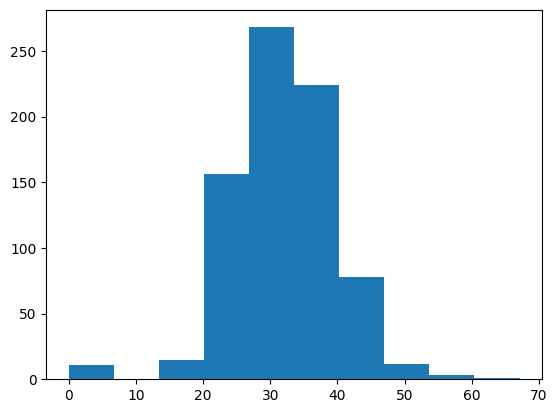

In [ ]:
plt.hist(diabetes_df['BMI'])

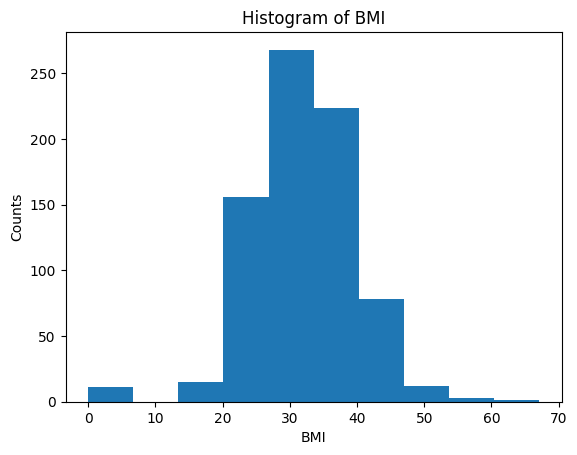

In [ ]:
# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(diabetes_df['BMI'])

# # Customize other aspects of the plot
ax.set_title('Histogram of BMI')
ax.set_xlabel('BMI')
ax.set_ylabel('Counts')

# Display the plot
plt.show()

- We can put multiple axes objects on the same figure by passing in arguments into the `plt.subplots()` function.
- We can also specify more settings for the histogram by passing in arguments into the `hist()` function.

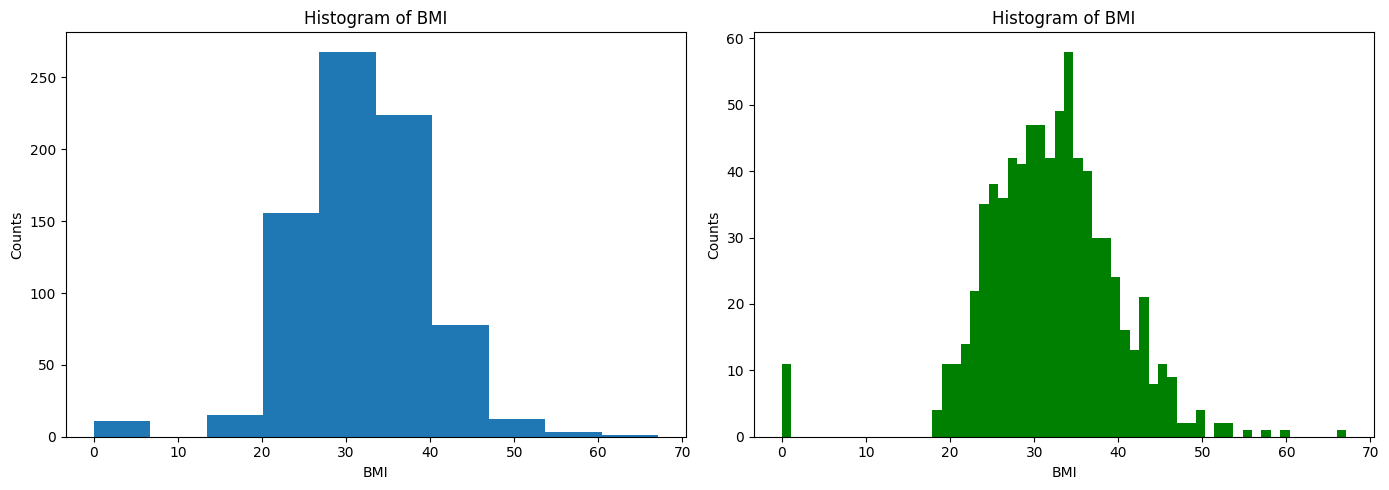

In [ ]:
# Create 2 graphs, arranged in a 1row X 2column. "axes" will be an array of Axes objects.
# Note: if our grid were 2D (i.e. more than 1 row and column), then "axes" would be a 2d array of Axes objects.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot 0
axes[0].hist(diabetes_df['BMI'])
axes[0].set_title('Histogram of BMI')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Counts')

# Plot 1
axes[1].hist(diabetes_df['BMI'], bins=60, color='green')
axes[1].set_title('Histogram of BMI')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Counts')
# axes[1].set_xlim(left=5)

plt.tight_layout()

plt.show()

A **box-plot** is also often used to examine distributions. Here you can visualize the min, max, each of the quartiles, the IQR, and any "outliers". In the default box-plot settings, outliers are determined to be those which are larger than $Q_3 + 1.5 \times IQR$ or smaller than $Q_1 - 1.5 \times IQR$. This value of 1.5 can be changed by specifying the `whis` parameter.

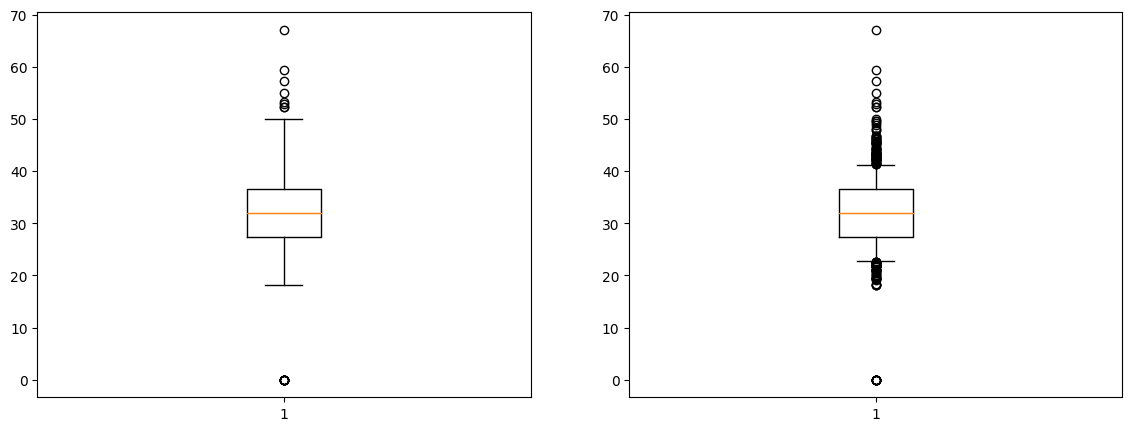

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].boxplot(diabetes_df['BMI'])
axes[1].boxplot(diabetes_df['BMI'], whis=0.5)

plt.show()

We can also use the `seaborn` library to create these same plots (and more). Most Seaborn plotting functions take in:
- A `data` argument, which is your Pandas dataframe
- One or more column names from your dataframe which dictate which parts are used for plotting

In [ ]:
# !pip install seaborn

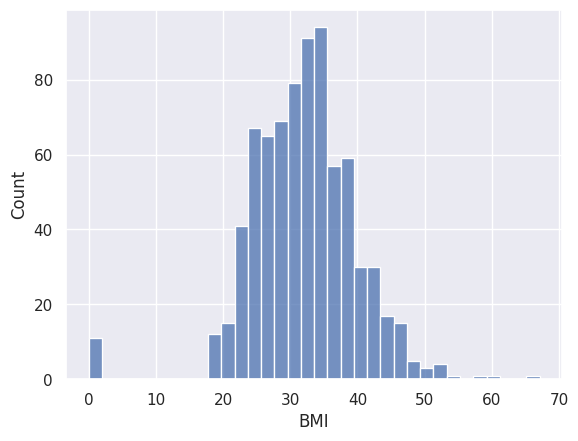

In [ ]:
import seaborn as sns

sns.set_theme()

#seaborn histogram
sns.histplot(data=diabetes_df, x="BMI")

plt.show()

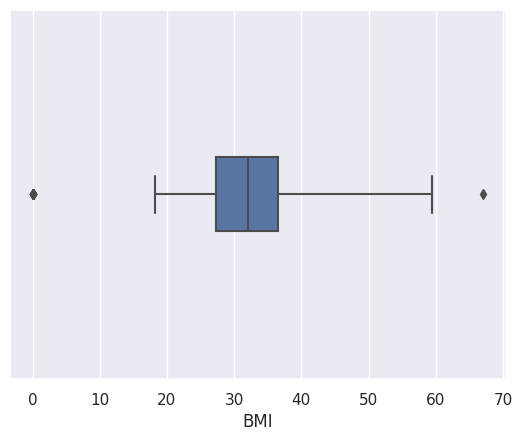

In [ ]:
#seaborn boxplot
sns.boxplot(data=diabetes_df, x="BMI", whis=2.5, width=0.2)

plt.show()

### Seaborn integration with matplotlib

Seaborn plots can be customized further using matplotlib. Any seaborn plotting function:
- Returns a matplotlib "Axes" object, which you can use just like any ordinary Matplotlib object.
- Can optionally take a Matplotlib "Axes" object as input, if you want to apply a Seaborn plot to an existing figure.

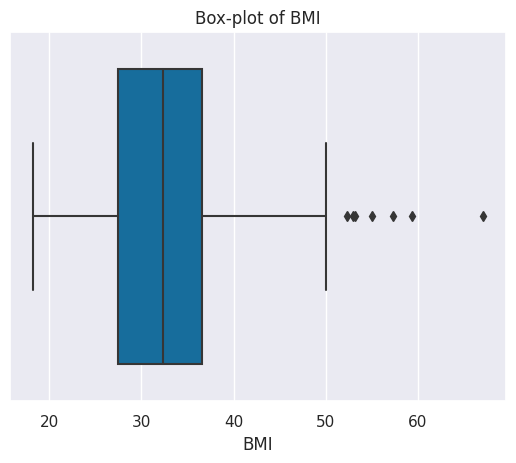

In [ ]:
ax = sns.boxplot(data=diabetes_df, x="BMI", whis=1.5)
ax.set_title("Box-plot of BMI")

plt.show()

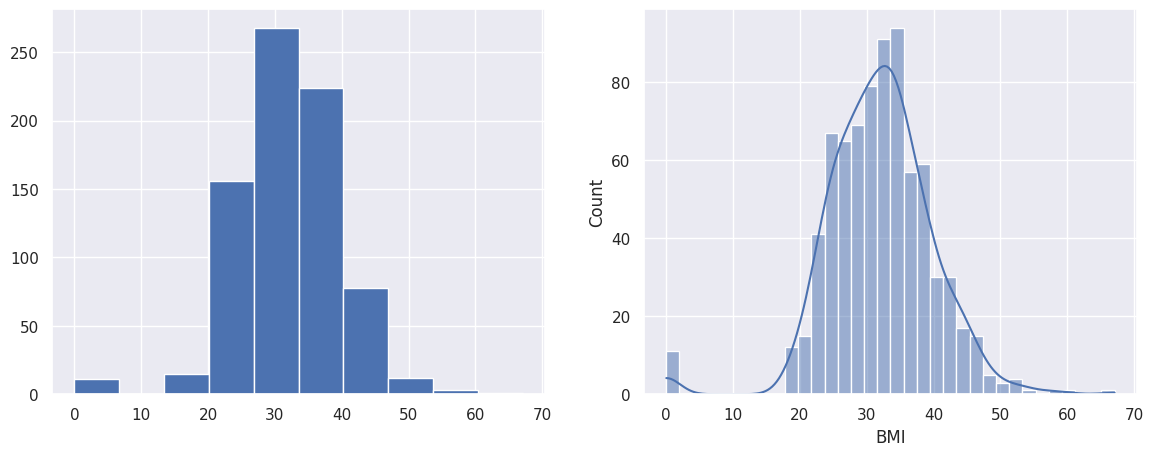

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#matplotlib histogram
axes[0].hist(diabetes_df['BMI'])

#seaborn histogram
# axes[1] = sns.histplot(data=diabetes_df, x="BMI")
sns.histplot(ax=axes[1], data=diabetes_df, x="BMI", kde=True)

plt.show()

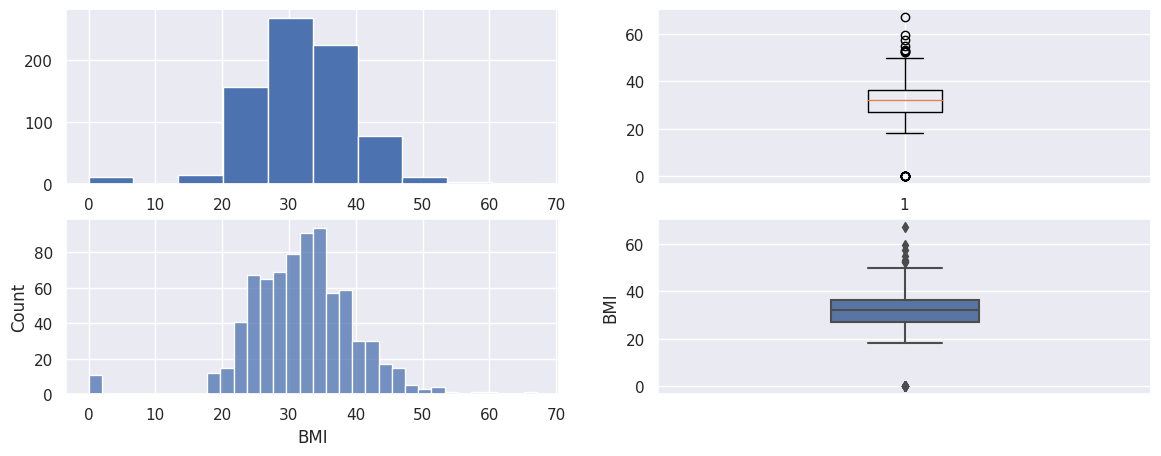

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 5))

#matplotlib
axes[0,0].hist(diabetes_df['BMI'])
axes[0,1].boxplot(diabetes_df['BMI'])

#seaborn
sns.histplot(ax=axes[1,0], data=diabetes_df, x="BMI")
sns.boxplot(ax=axes[1,1], data=diabetes_df, y="BMI", width=0.3)

plt.show()

Seaborn also has plots that visualize a "smoothed" version of the distribution.

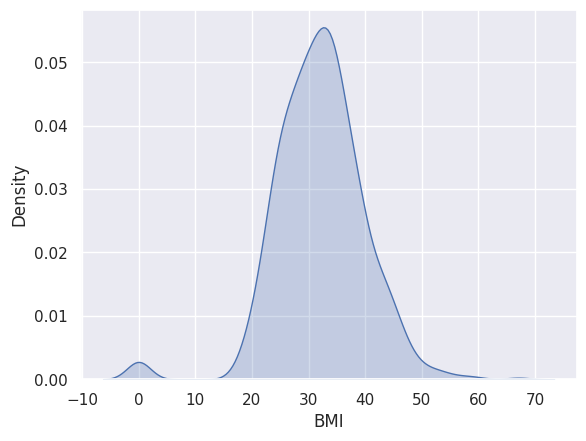

In [ ]:
sns.kdeplot(data=diabetes_df, x="BMI", fill=True)
plt.show()

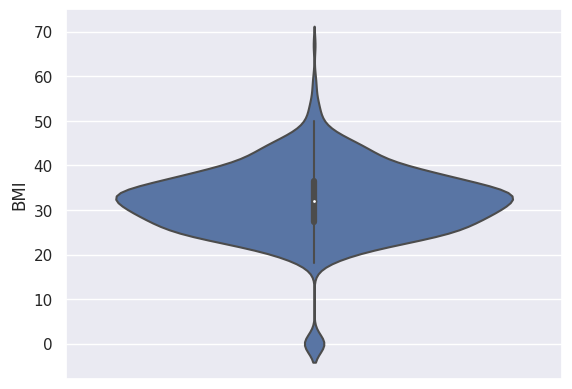

In [ ]:
sns.violinplot(data=diabetes_df, y="BMI")
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

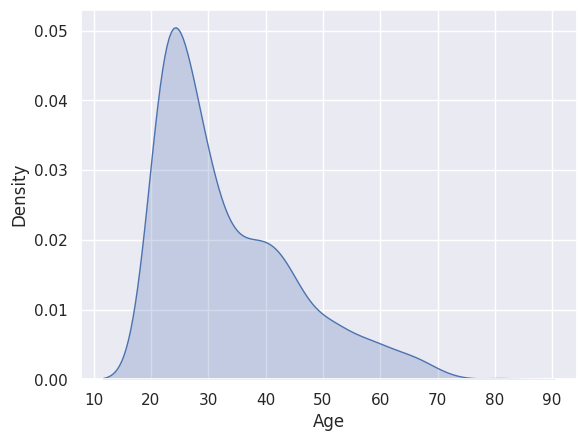

In [ ]:
sns.kdeplot(data=diabetes_df, x="Age", fill=True)

### Skewness

From the two plots above, we can see that the distribution of "Age" is not symmetrical like "BMI" was. In this case, "Age" is "right-skewed". Some of the models you'll learn about have the assumption that the data must be either symmetrical or "normally distributed".
![](images/skewness.png)

### Using data visualization for EDA on multiple variables
Up until now, we have only been exploring a single variable at a time. Another part of EDA is examining multiple variables at the same time to look for trends, patterns, or relationships between variables.

We can create a histogram-equivalent on two variables by having each variable on the x and y axes, and have the counts be represented by color density.

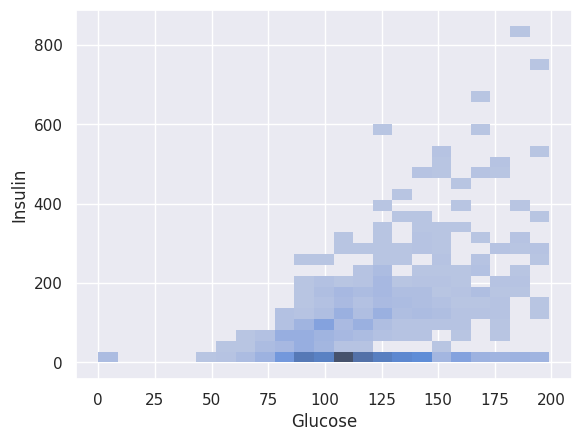

In [ ]:
sns.histplot(data=diabetes_df, x="Glucose", y="Insulin")
plt.show()

We can also display the same information using a contour plot or a scatter plot.

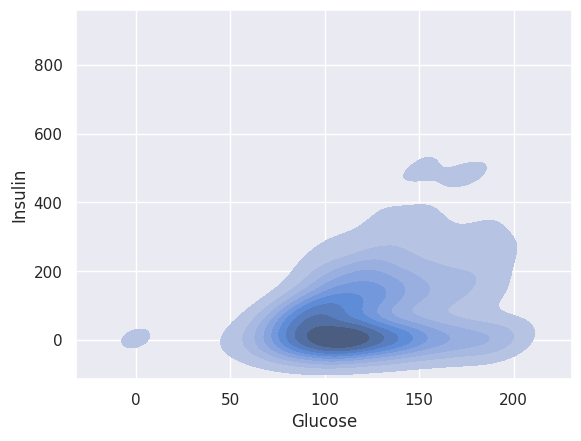

In [ ]:
sns.kdeplot(data=diabetes_df, x="Glucose", y="Insulin", fill=True)
plt.show()

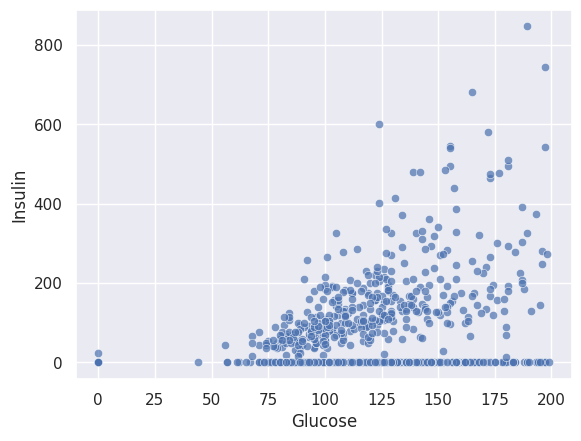

In [ ]:
sns.scatterplot(data=diabetes_df, x="Glucose", y="Insulin", alpha=0.7)
plt.show()

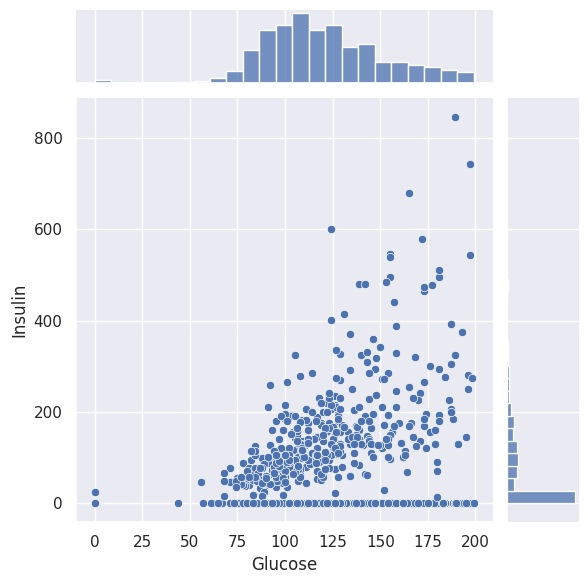

In [ ]:
sns.jointplot(data=diabetes_df, x="Glucose", y="Insulin")
plt.show()

From these plots we can see that it seems like there may be a postive relationship between insulin and glucose. Linear relationships between two variables can be identified by examining the **correlation** between the two variables. Pandas has a convenient `.corr()` method to view the correlations between all variables at once via its **correlation matrix**.

> Correlation is a number between -1 and 1. Correlation is positive when the variables increase together, and
Correlation is negative when one varialbe decreases as the other increases. A correlation near zero indicates the variables are not linearly related.

In [ ]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


We can also view this correlation matrix in a visually pleasing way by using a seaborn heatmap

<Axes: >

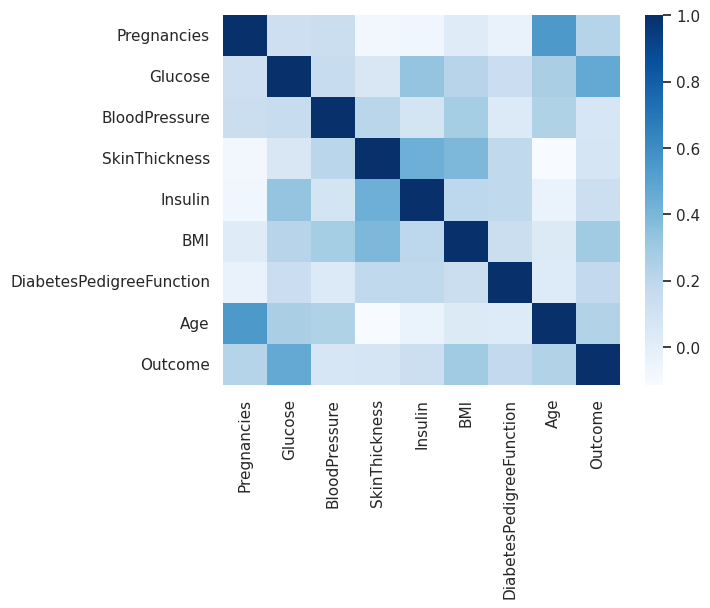

In [ ]:
sns.heatmap(diabetes_df.corr(), cmap='Blues')

We can view different graphs that perform pairwise comparisons all at once beyond just looking at the correlation. For example, if we want to view and compare many distributions at the same time, we can use the `pairplot()` or the more general `pairgrid()` functions.

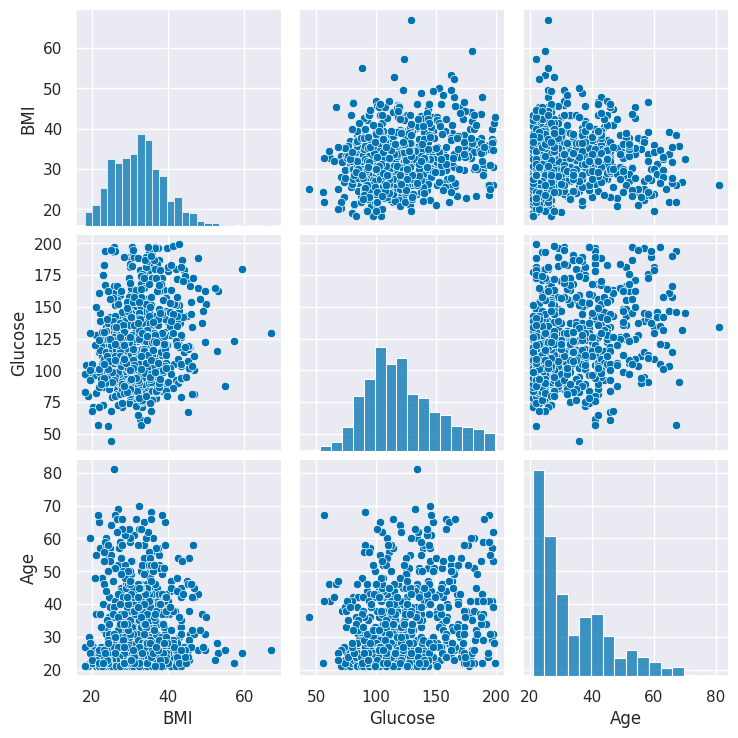

In [ ]:
sns.pairplot(diabetes_df[['BMI', 'Glucose', 'Age']])
plt.show()

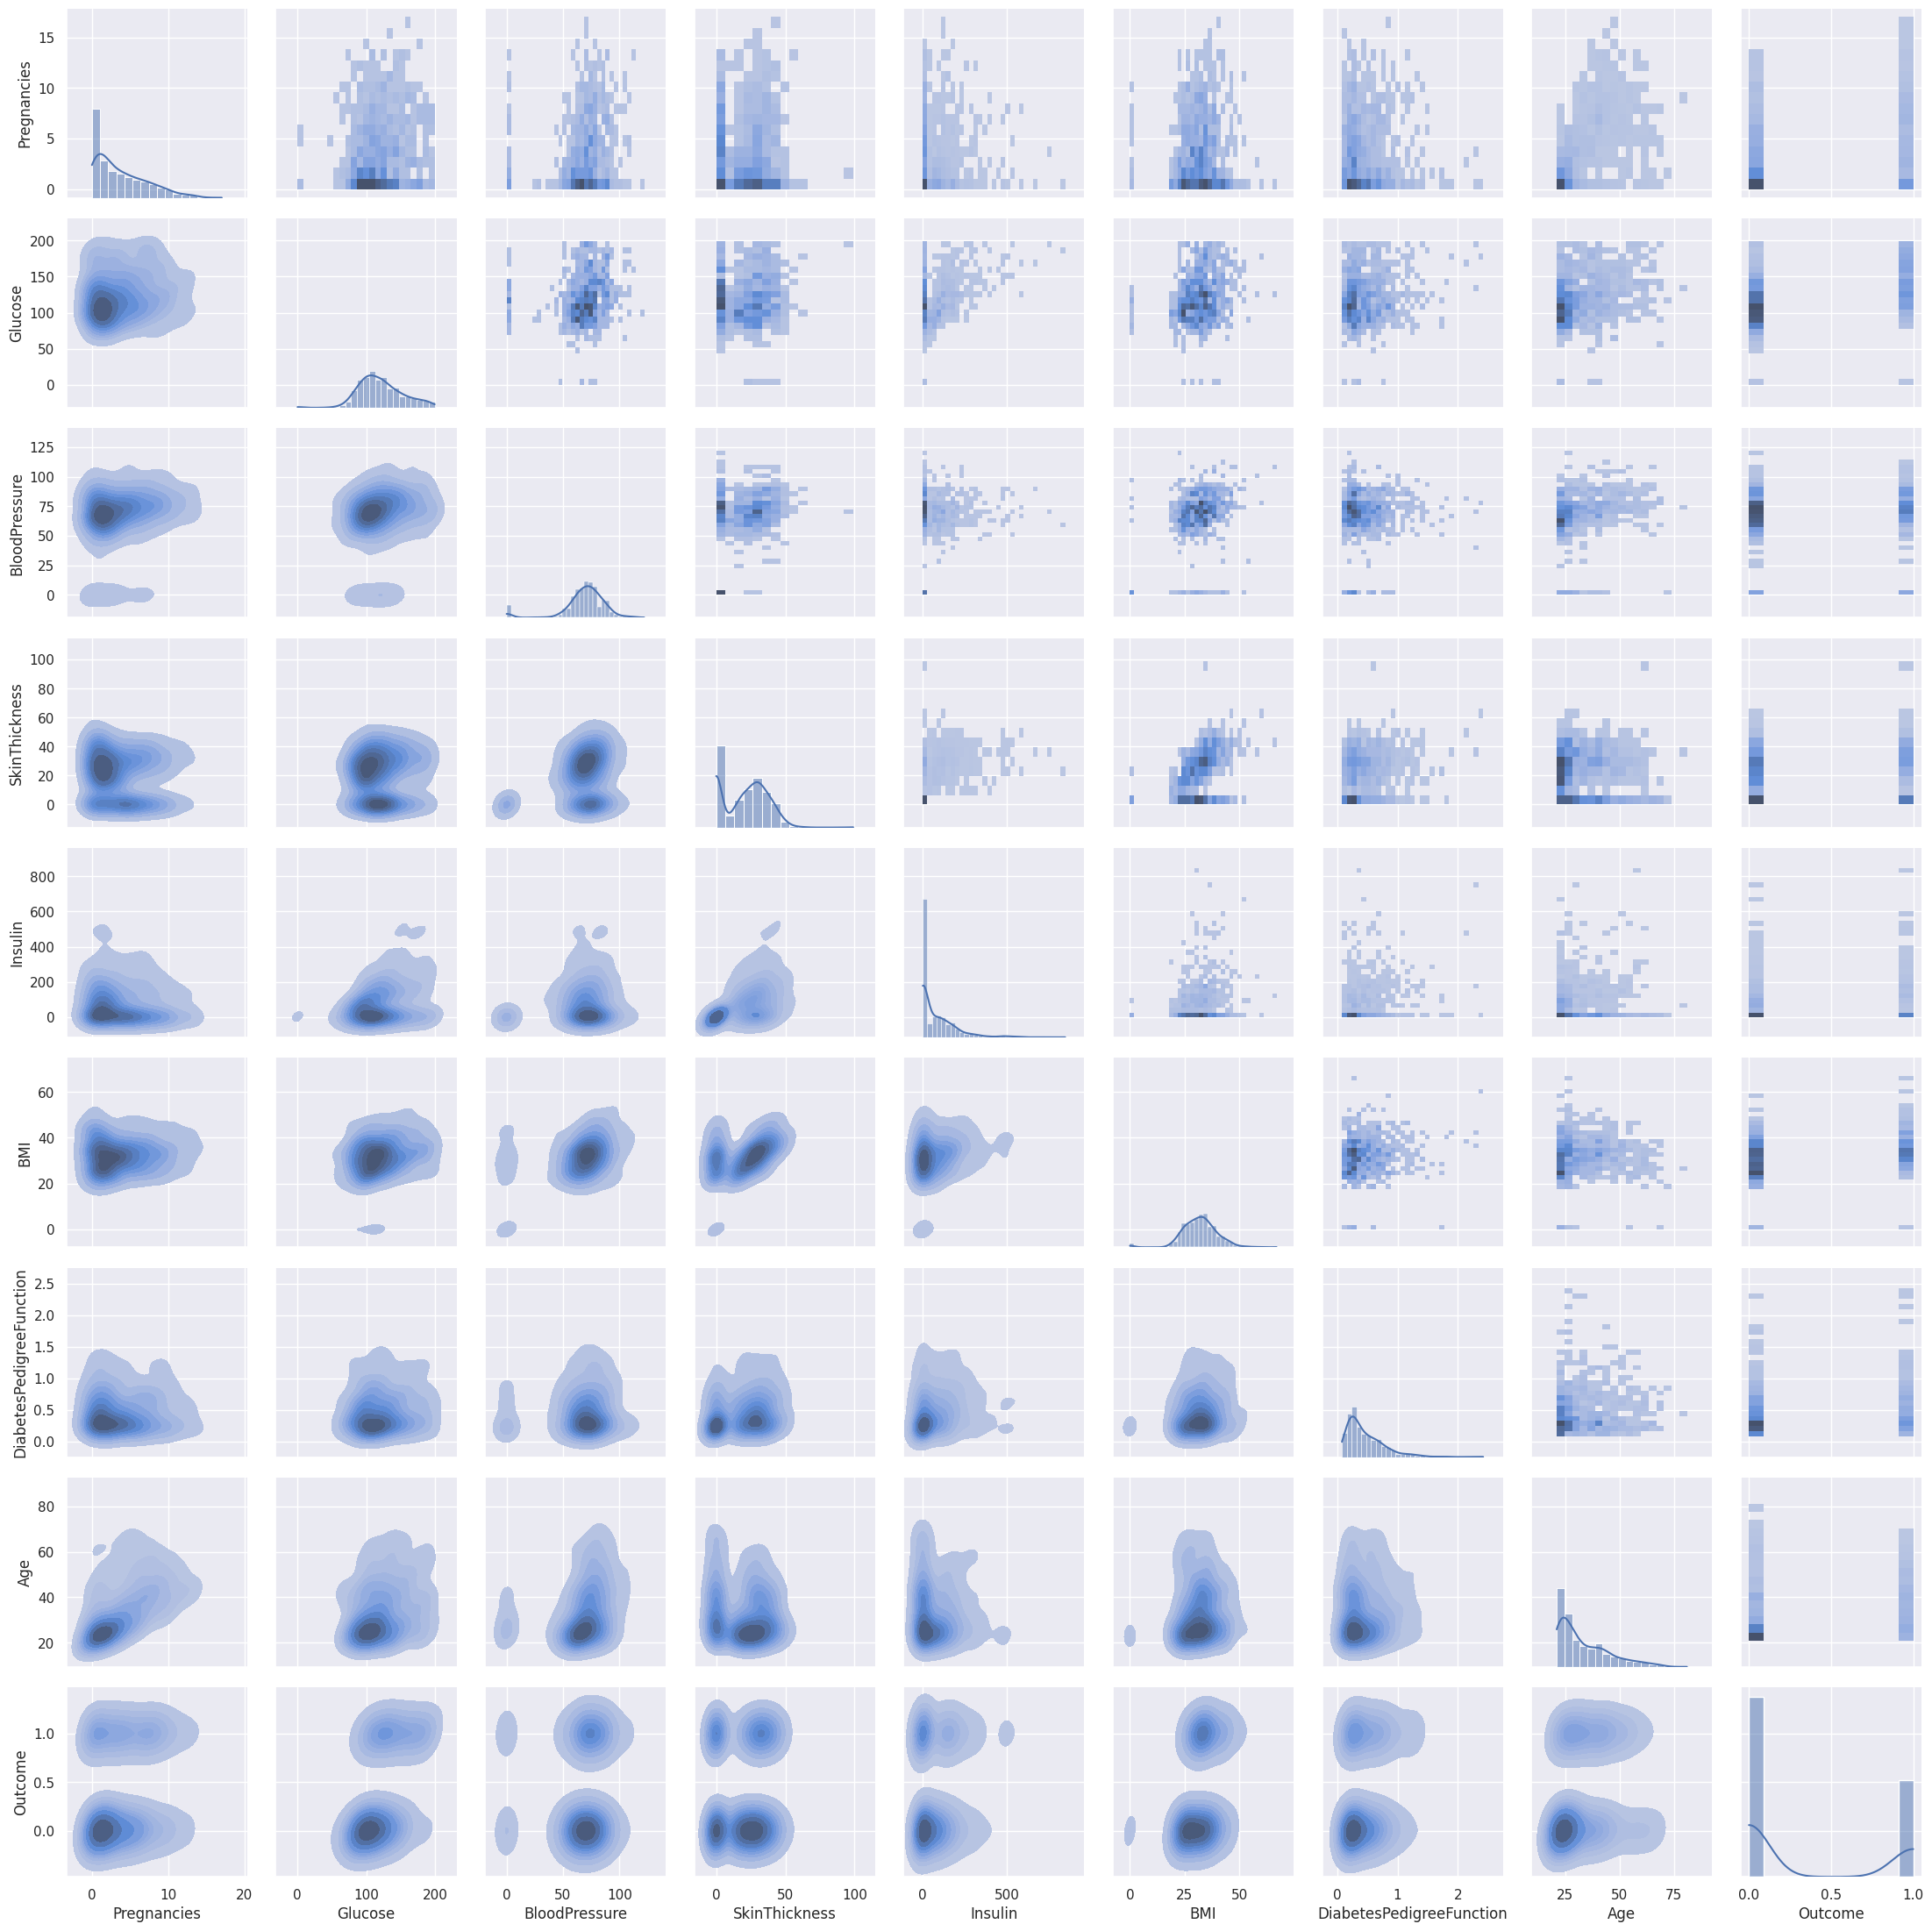

In [ ]:
ax = sns.PairGrid(diabetes_df)
ax.map_upper(sns.histplot)
ax.map_lower(sns.kdeplot, fill=True)
ax.map_diag(sns.histplot, kde=True)
plt.show()

### Displaying info of more than two variables
Most of the time in seaborn, plotting functions take in an optional `hue` parameter which corresponds to a (categorical) variable that will be used to group the data (using different colors). The colours and legend will be created automatically, but can be customized using parameters. There are often many other parameters too, depending on the plot type, for which you can simply pass in column names that will dictate plot attributes. This flexibility to work with a single dataframe and use various columns to customize different properties of the resulting graph is one of the things that makes Seaborn so powerful and easy to use.
> Try going back to some of the previous plots and try adding the `hue='Outcome'` parameter to view the data grouped by 'Outcome'.

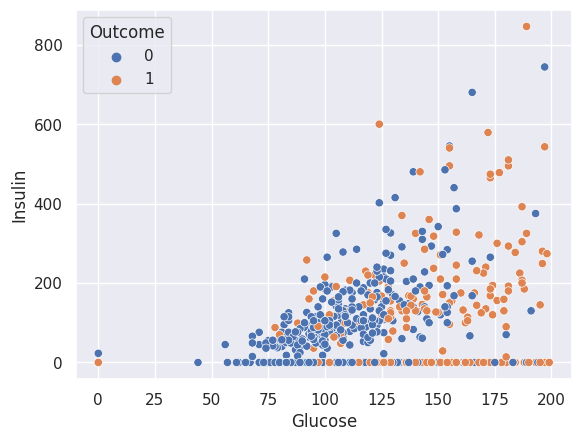

In [ ]:
sns.scatterplot(data=diabetes_df, x='Glucose', y='Insulin', hue='Outcome')
plt.show()

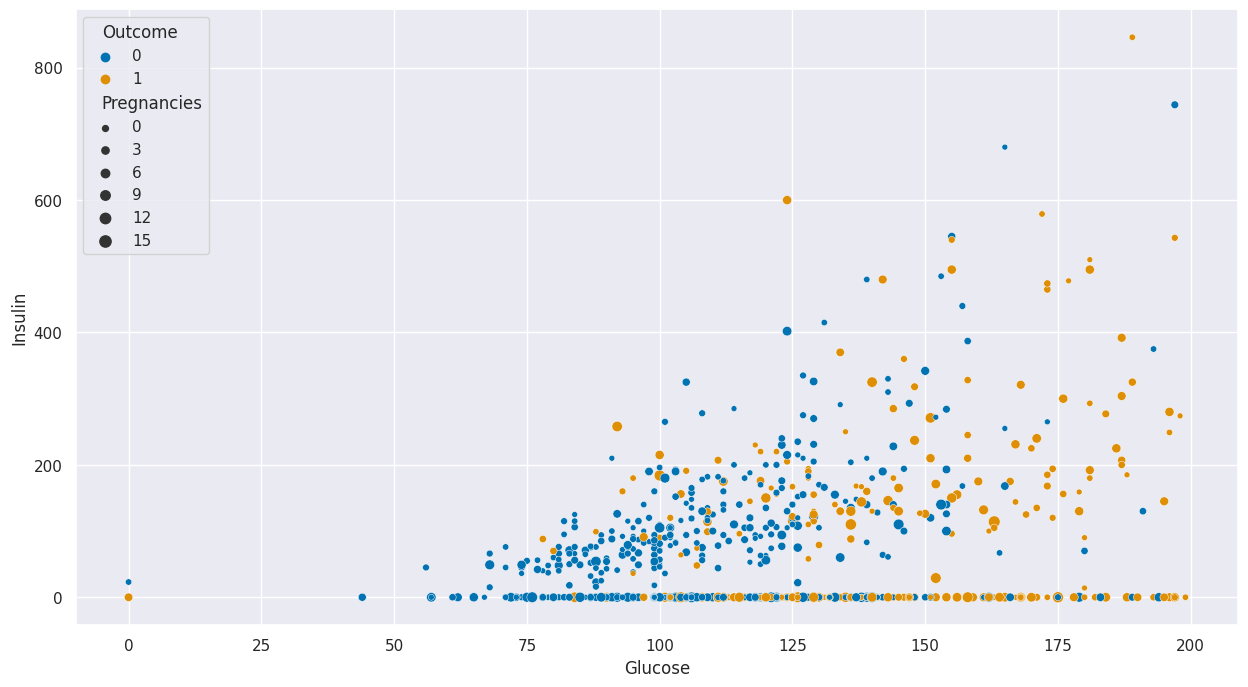

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=diabetes_df, x='Glucose', y='Insulin', hue='Outcome', size='Pregnancies')

plt.show()

In [ ]:
sns.set_theme(palette='colorblind')

### There are many more complex plot types

Some plot types will even automatically compute things for you and display them
(such as error bars).

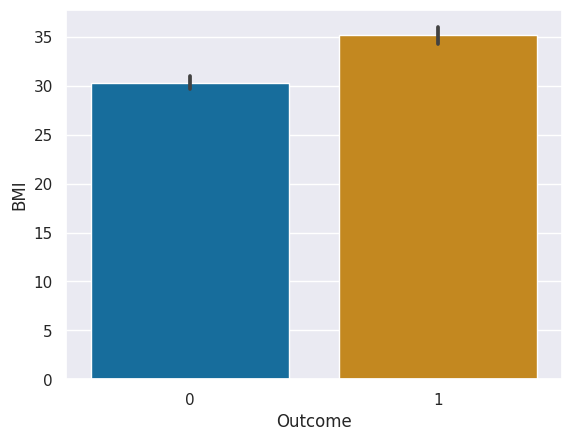

In [ ]:
plt.figure(figsize=(6.4,4.8)) #default size
sns.barplot(data=diabetes_df, x='Outcome', y='BMI') #averages with error bars

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


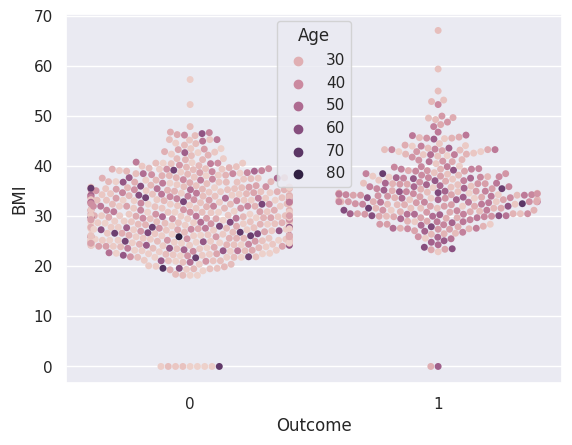

In [ ]:
sns.swarmplot(data=diabetes_df, x='Outcome', y='BMI', hue='Age')
# sns.stripplot(data=diabetes_df, x='Outcome', y='BMI')

plt.show()

### Seaborn examples
Check out Seaborn's example plotting gallery [here](https://seaborn.pydata.org/examples/index.html) for inspiration on the different types of graphs possible with Seaborn.

## Plotly

Plotly's main feature over matplotlib and seaborn is its hover tool capability. Plotly can be installed:
- using pip: `pip install plotly`
- or conda: `conda install -c plotly plotly`.

### JupyterLab:
For use in JupyterLab, also install the jupyterlab and ipywidgets packages:
- using pip: `pip install "jupyterlab>=3" "ipywidgets>=7.6"`
- or conda: `conda install "jupyterlab>=3" "ipywidgets>=7.6"`

You'll need jupyter-dash to add widgets such as sliders, dropdowns, and buttons to Plotly charts in JupyterLab.
- using pip: `pip install jupyter-dash`
- or conda: `conda install -c conda-forge -c plotly jupyter-dash`

### Jupyter Notebook:

For use in Jupyter Notebook, install the notebook and ipywidgets packages:
- using pip: `pip install "notebook>=5.3" "ipywidgets>=7.5"`
- or conda: `conda install "notebook>=5.3" "ipywidgets>=7.5"`

In [ ]:
# !pip install plotly
# !pip install "notebook>=5.3" "ipywidgets>=7.5"

Plotly's syntax is similar to seaborn's plotting functions (with some parameter name changes), but the main difference is the `hover_data` parameter in most plotting functions.

In [ ]:
import plotly.express as px

fig = px.scatter(diabetes_df, x='Glucose', y='Insulin', color='Outcome', size='Pregnancies', hover_data=['BMI', 'Age'])
fig.show()

In [ ]:
fig = px.scatter_matrix(diabetes_df,
                        dimensions=['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'],
                        hover_data=['BloodPressure', 'SkinThickness'],
                        color="Outcome")
fig.show()

There's obviously much more you can do with Plotly. You will explore Plotly further in your compass exercises :)

---
##  Outlier Detection

- Data can have incorrect values (human error, system error)
- **Outlier**: an observation point that is distant from other observations
- Outliers are helpful for pointing out what can be wrong
- It is sometimes obvious how to deal with errors, but often it requires domain-specific knowledge to determine the proper course of action.

> Note: Before simply deleting outliers, determine if this is needed. It depends on your use case and if the outliers are important (e.g., fraud detection).

### Summary statistics

We saw earlier that by viewing the summary statistics of each our variables, we can identify anomolies and potential outliers.

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualizations

We saw earlier that visualizations such as histograms, boxplots, and scatterplots can also help us identify outliers.

<Axes: xlabel='BMI', ylabel='Count'>

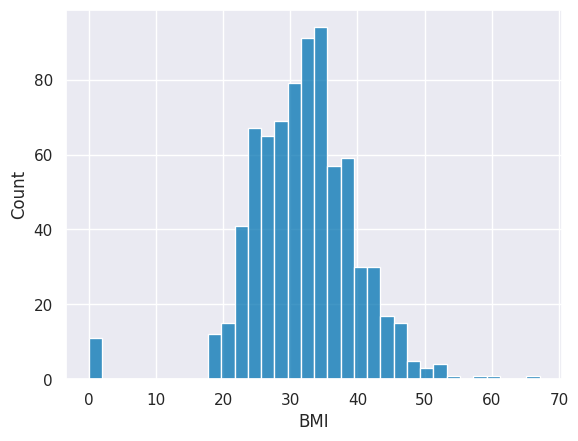

In [ ]:
sns.histplot(x=diabetes_df['BMI'])

<Axes: xlabel='Insulin'>

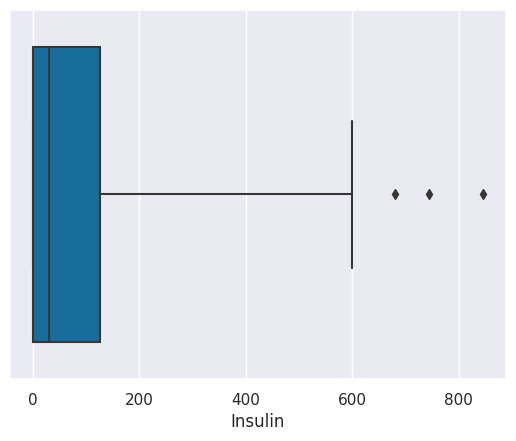

In [ ]:
# sns.boxplot(x=diabetes_df['Glucose'])
sns.boxplot(x=diabetes_df['Insulin'], whis=4)

<Axes: xlabel='BMI', ylabel='SkinThickness'>

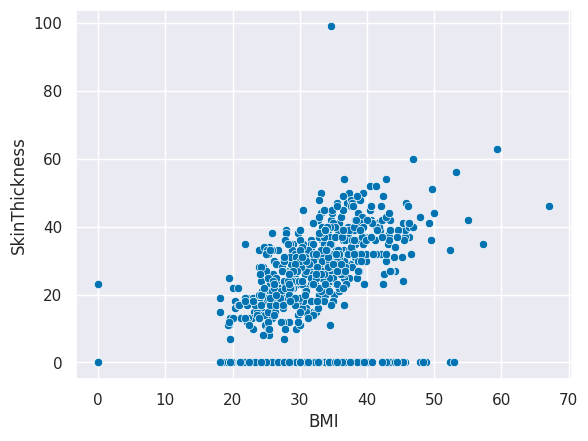

In [ ]:
sns.scatterplot(data=diabetes_df, x='BMI', y='SkinThickness')

### Z-scores

Another way to detect outliers is to remove values with a z-score greater than 3. The z-score is measured in terms of number of standard deviations away from the mean.

$$
Z = \dfrac{x-\mu}{\sigma}
$$

- Z-score of 0 indicates the value is the mean
- Z-score of 1 indicates the value is within 1 standard deviation from the mean.
- Z-score of 2 indicates the value is within 2 standard deviations from the mean.
- Z-score of 3 indicates the value is within 3 standard deviations from the mean.
- **Z-scores above 3 indicate the value is greater than 3 standard deviations from the mean. Data Scientists often label values with a z-score above 3 as outliers.**

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
(diabetes_df['BMI'] - diabetes_df['BMI'].mean()) / diabetes_df['BMI'].std()

0      0.203880
1     -0.683976
2     -1.102537
3     -0.493721
4      1.408828
         ...   
763    0.115094
764    0.609757
765   -0.734711
766   -0.240048
767   -0.201997
Name: BMI, Length: 768, dtype: float64

In [ ]:
#Finding Z Score on Column
zscores_bmi = stats.zscore(diabetes_df['BMI'])
zscores_bmi

0      0.204013
1     -0.684422
2     -1.103255
3     -0.494043
4      1.409746
         ...   
763    0.115169
764    0.610154
765   -0.735190
766   -0.240205
767   -0.202129
Name: BMI, Length: 768, dtype: float64

In [ ]:
#Turning Absolute
zscores_bmi = np.abs(zscores_bmi)
zscores_bmi

0      0.204013
1      0.684422
2      1.103255
3      0.494043
4      1.409746
         ...   
763    0.115169
764    0.610154
765    0.735190
766    0.240205
767    0.202129
Name: BMI, Length: 768, dtype: float64

In [ ]:
otlier_bmi = zscores_bmi > 3
otlier_bmi

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BMI, Length: 768, dtype: bool

In [ ]:
#view the outliers
diabetes_df['BMI'][otlier_bmi]

9       0.0
49      0.0
60      0.0
81      0.0
145     0.0
177    67.1
371     0.0
426     0.0
445    59.4
494     0.0
522     0.0
673    57.3
684     0.0
706     0.0
Name: BMI, dtype: float64

### Dealing with Outliers

- Can drop the observation (if appropriate)
- Can fix the observation (e.g., obvious typo, missing value)
- Explore what caused the outlier

---
## Handling Missing Values

Many times we will be handed data with missing data or corrupted data. Most commonly, missing data are represented as NaNs. NaNs are blank elements in Pandas.

- It can be a system error that causes missing values, or it wasn't captured.
- There are techniques to deal with missing data, but all of them are imperfect.

In [ ]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Coded null values
- Sometimes null values aren't exactly NaNs
- They are encoded as -1, 0, or 9999 etc.

### Encoding true NaNs as NaNs
- Won't be used in statistical calculations (e.g., average, count)
- Some columns have a lot of what we think could be missing values

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
(diabetes_df['Insulin']==0).sum() #check how  many zeros there are in each column

374

In [ ]:
for column_name in diabetes_df.columns:
    count = (diabetes_df[column_name] == 0).sum()
    print('Num zeros in column', column_name, 'is:', count)

Num zeros in column Pregnancies is: 111
Num zeros in column Glucose is: 5
Num zeros in column BloodPressure is: 35
Num zeros in column SkinThickness is: 227
Num zeros in column Insulin is: 374
Num zeros in column BMI is: 11
Num zeros in column DiabetesPedigreeFunction is: 0
Num zeros in column Age is: 0
Num zeros in column Outcome is: 500


In [ ]:
cols_missing_vals = ['Glucose', 'Insulin', 'BloodPressure', 'SkinThickness', 'BMI'] # cols with inappropriate 0s
diabetes_df[cols_missing_vals] = diabetes_df[cols_missing_vals].replace(0, np.NaN) # replace 0's with NaNs
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Null values: Dropping Missing Values
- Could be a good idea if there aren't too many rows removed
- Let's do this for the Glucose, BMI, and BloodPressure columns

In [ ]:
print("Shape before dropping NAs", diabetes_df.shape)

diabetes_df = diabetes_df.dropna(subset=['Glucose', 'BMI', 'BloodPressure']) # drop rows with Glucose and BMI as NaN

print("Shape after dropping NAs for Glucose and BMI columns", diabetes_df.shape)

Shape before dropping NAs (724, 9)
Shape after dropping NAs for Glucose and BMI columns (724, 9)


In [ ]:
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Null values: Imputation using the average
- Can fill in using the average of the rest of the column.
- Can also use median, mode, or other advanced techniques (regression).

In [ ]:
# Fill in missing values with the average (for SkinThickness)
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].fillna(value=diabetes_df['SkinThickness'].median())
diabetes_df['Insulin'] = diabetes_df['Insulin'].fillna(value=diabetes_df['Insulin'].median())

diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.133978,142.044199,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.019267,88.713438,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.500000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
